The idea here is :
- the first column can be computed directly
- for the other columns it's more difficult actually (for example if i started at the top of the column i don't know the best 
  value below me ( so here i tried all the ways below me )

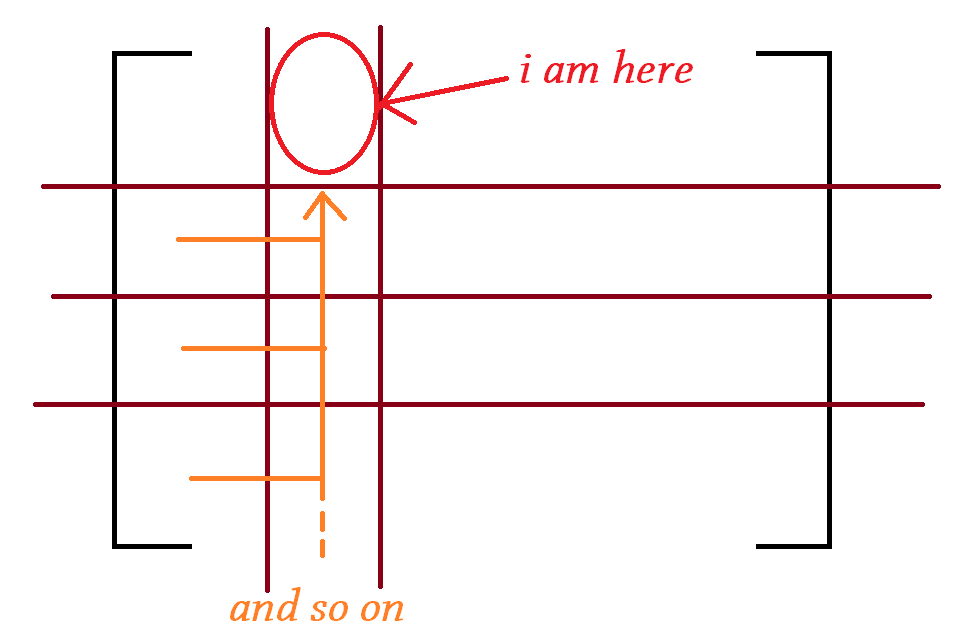

In [12]:
from IPython.display import Image
Image("The idea.png")

In [1]:
import numpy as np

In [2]:
Test_Matrix = np.array([[131,673,234,103,18],
                        [201,96,342,965,150],
                        [630,803,746,422,111],
                        [537,699,497,121,956],
                        [805,732,524,37,331]])

In [3]:
Problem_Matrix = open("p081_matrix.txt",'r')

In [4]:
Prob_Matrix = []
for row in Problem_Matrix:
    Row = row.split(',')
    Row[-1] = Row[-1][:-1]                     #not to take '\n'
    Prob_Matrix.append(list(map(int,Row)))
Prob_Matrix = np.array(Prob_Matrix)

In [5]:
def get_min_in_firsts(matrix,matrix_size,start_pos):
    #put the minimum cost in each cell in the first row and column
    min_sum_matrix = np.zeros((matrix_size,matrix_size))
    min_sum_matrix[start_pos,0] = matrix[start_pos,0]
    Range = [i for i in range(matrix_size)]
    Range.remove(start_pos)
    for i in Range:            
        if i > start_pos:
            min_sum_matrix[i,0] = sum(matrix[start_pos:i+1,0])
        else:
            min_sum_matrix[i,0] = sum(matrix[i:start_pos+1,0])
    
    return min_sum_matrix

In [6]:
def get_min_down(row,col,matrix_result,matrix_reference,matrix_size):
    cells_below = []
    for r in range(row+1,matrix_size):
         cells_below.append(matrix_result[r,col-1]+sum(matrix_reference[row+1:r+1,col])) 
    
    return min(cells_below)

In [21]:
def get_min_col_by_col(matrix_result,matrix_reference,matrix_size):
    for col in range(1,matrix_size):
        left_cell = matrix_result[0,col-1]
        down_cell = get_min_down(0,col,matrix_result,matrix_reference,matrix_size)
        matrix_result[0,col] = matrix_reference[0,col] + min(left_cell,down_cell)
        for row in range(1,matrix_size):
            up_cell   = matrix_result[row-1,col]
            left_cell = matrix_result[row,col-1]
            down_cell = get_min_down(row,col,matrix_result,matrix_reference,matrix_size) if(row!=(matrix_size-1))else 9999999 
            matrix_result[row,col] = matrix_reference[row,col] + min(left_cell,down_cell,up_cell)  
  
    #return min(matrix_result[:,matrix_size-1])
    return matrix_result

In [9]:
def get_min_from_left_2_right(matrix_reference):
    Min = 9999999
    matrix_size = matrix_reference.shape[0]
    for s in range(matrix_size):
        matrix_result = get_min_in_firsts(matrix_reference,matrix_size,s)
        Sum           = get_min_col_by_col(matrix_result,matrix_reference,matrix_size)
        
        if Sum < Min:
            Min = Sum
    
    print(Min)

In [11]:
%time get_min_from_left_2_right(Prob_Matrix)

260324.0
Wall time: 4min 24s


### Short Sol

In [31]:
def short_sol():
    f = open('p081_matrix.txt')
    m = [list(map(int, line.strip().split(','))) for line in f]
    f.close()

    #m = Test_Matrix
    opt = [[row[0]] for row in m]
    for col in range(1, len(m[0])):
        for row in range(len(m)):
            opt[row].append(m[row][col] + opt[row][col - 1])

        for row in range(1, len(m)):
            if opt[row - 1][col] + m[row][col] < opt[row][col]:
                opt[row][col] = opt[row - 1][col] + m[row][col]

        for row in reversed(range(len(m) - 1)):
            if opt[row + 1][col] + m[row][col] < opt[row][col]:
                opt[row][col] = opt[row + 1][col] + m[row][col]

    print(min(row[-1] for row in opt))

In [32]:
%time short_sol()

260324
Wall time: 298 ms
